In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')
df = df.dropna()
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [22]:
seogwipo = df[df['정점명'].isin(['서귀포1', '서귀포2', '서귀포3'])].drop(['정점명'], axis=1)

In [23]:
seogwipo

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
3,2021-11-20,30.0,12.0,1,20.41,34.04,8.16,9.49,1.76,9.42,...,0.98,0,0,1,0,0,1,2021,11,20
4,2021-11-20,23.0,13.0,1,20.53,34.08,8.15,8.81,1.63,12.01,...,0.66,0,0,1,0,0,1,2021,11,20
5,2021-11-20,40.0,11.0,1,20.48,34.10,8.15,8.91,2.15,6.16,...,0.69,0,0,1,0,0,1,2021,11,20
12,2021-11-20,30.0,12.0,1,20.31,34.06,8.15,9.66,0.58,28.35,...,1.21,0,0,1,0,1,0,2021,11,20
13,2021-11-20,23.0,13.0,1,20.39,34.16,8.15,8.80,0.30,7.25,...,1.35,0,0,1,0,1,0,2021,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,2011-02-23,33.0,7.2,2,14.83,34.50,8.11,9.32,1.03,11.10,...,2.00,0,0,1,0,1,0,2011,2,23
1612,2011-02-22,40.0,7.8,1,14.98,34.49,8.10,8.87,0.31,11.50,...,0.81,0,1,0,0,0,1,2011,2,22
1613,2011-02-22,41.0,8.5,1,14.92,34.46,8.09,9.11,1.40,30.00,...,0.64,0,1,0,0,0,1,2011,2,22
1623,2011-02-22,40.0,7.8,1,14.99,34.50,8.10,9.13,0.63,7.60,...,0.84,0,1,0,0,1,0,2011,2,22


In [24]:
seogwipo.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

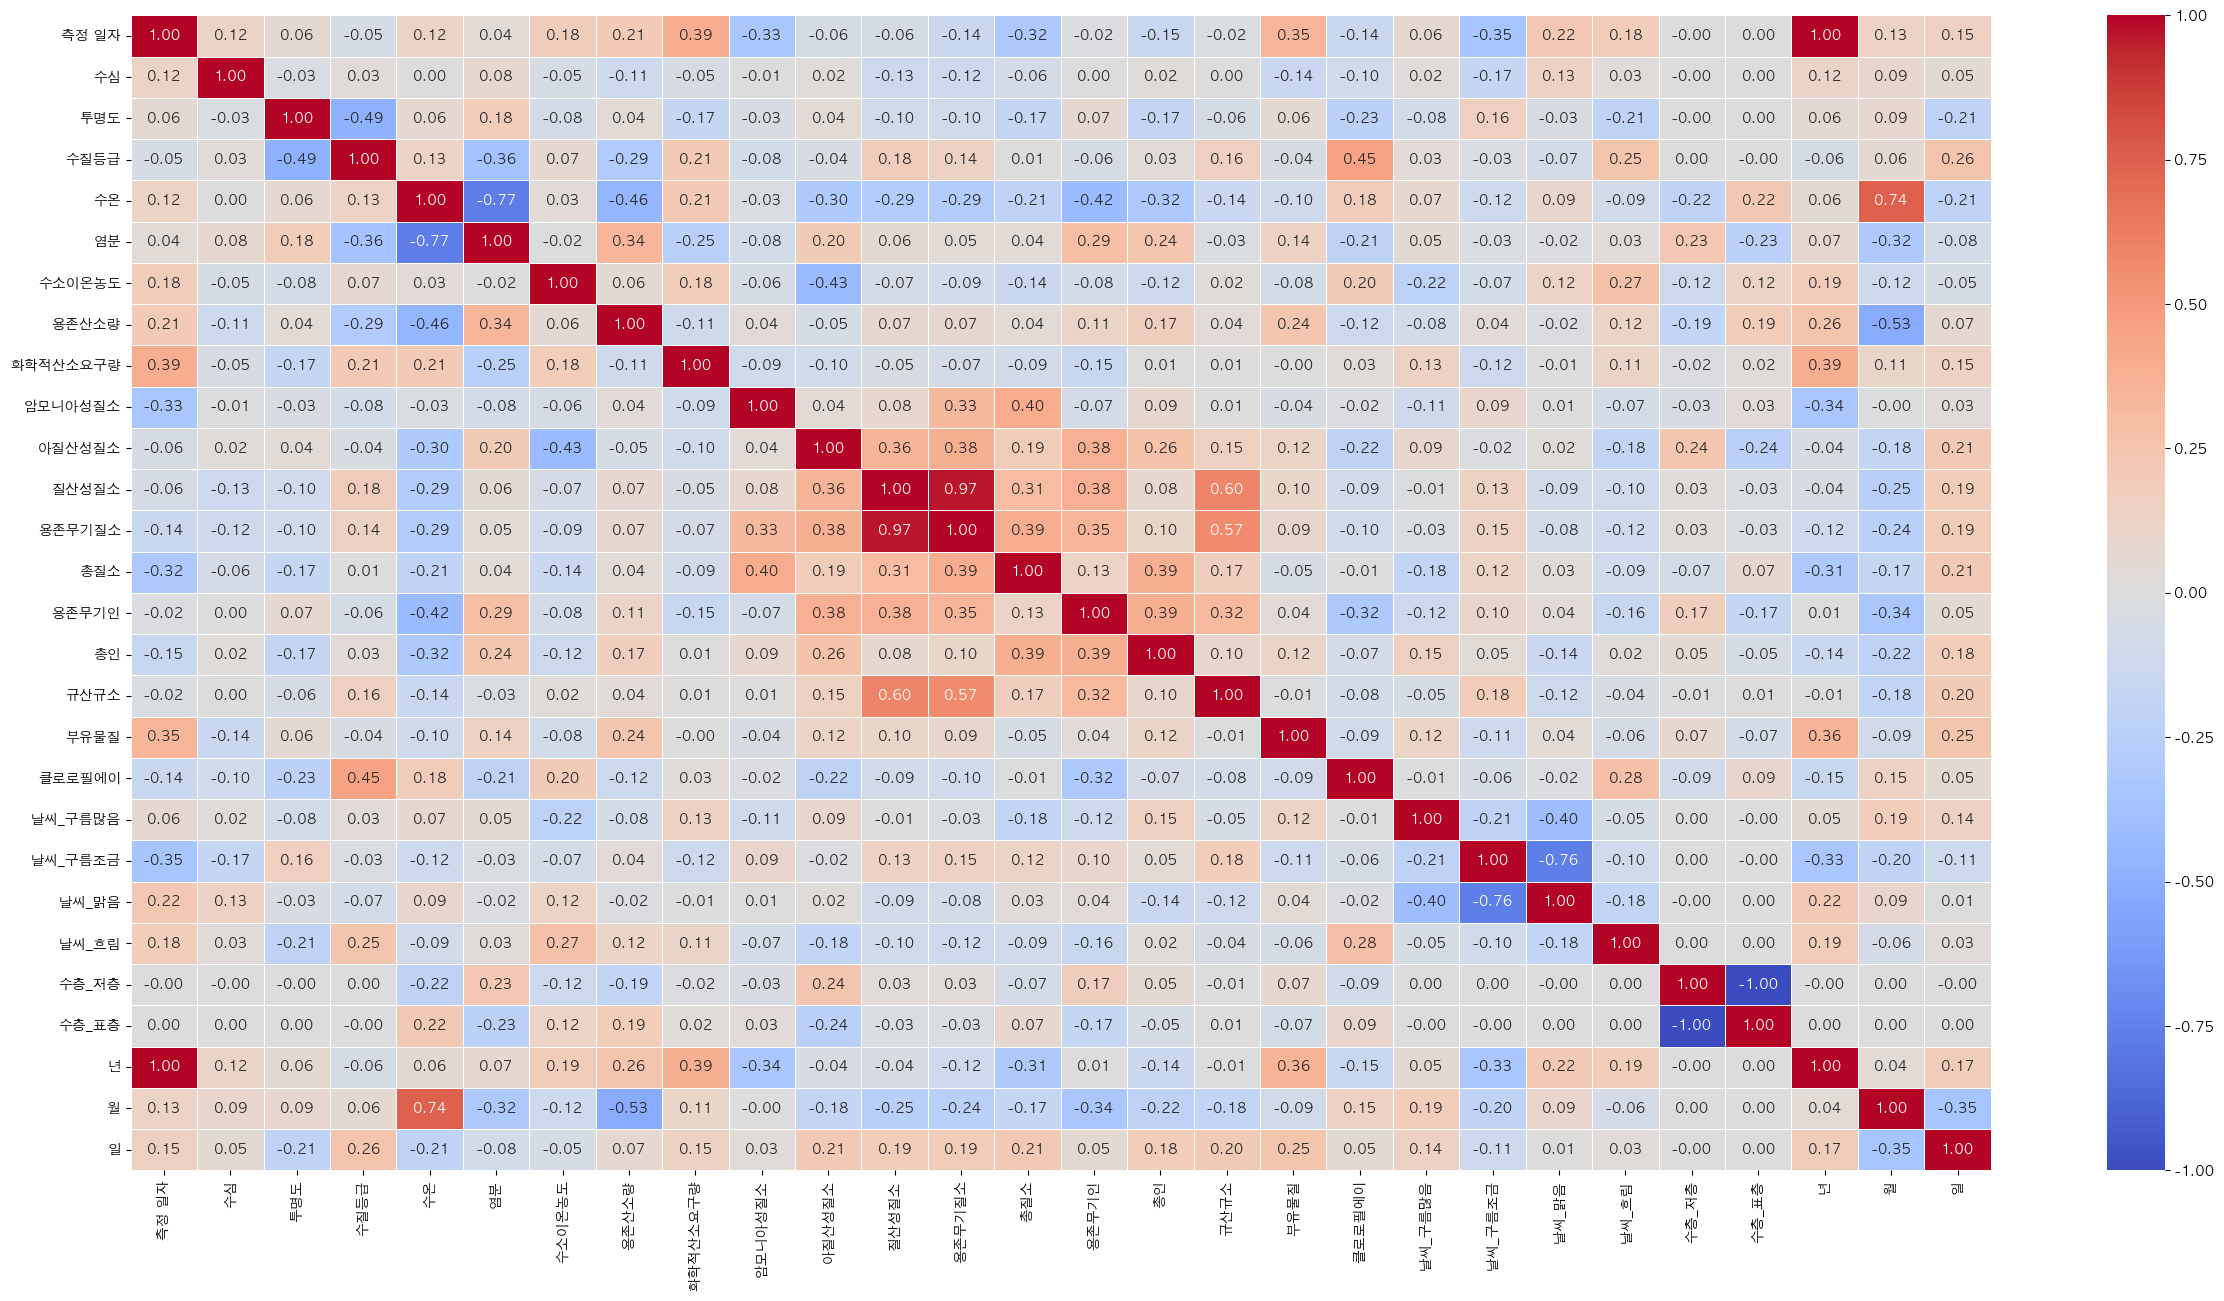

In [25]:
seogwipocorr = seogwipo.corr()


plt.figure(figsize=(30, 15))
sns.heatmap(seogwipocorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [26]:
temp = seogwipo.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [27]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
3,20.41,0,0,1,0,11
4,20.53,0,0,1,0,11
5,20.48,0,0,1,0,11
12,20.31,0,0,1,0,11
13,20.39,0,0,1,0,11
...,...,...,...,...,...,...
1607,14.83,0,0,1,0,2
1612,14.98,0,1,0,0,2
1613,14.92,0,1,0,0,2
1623,14.99,0,1,0,0,2


In [28]:
tempcorrs=temp.corr()


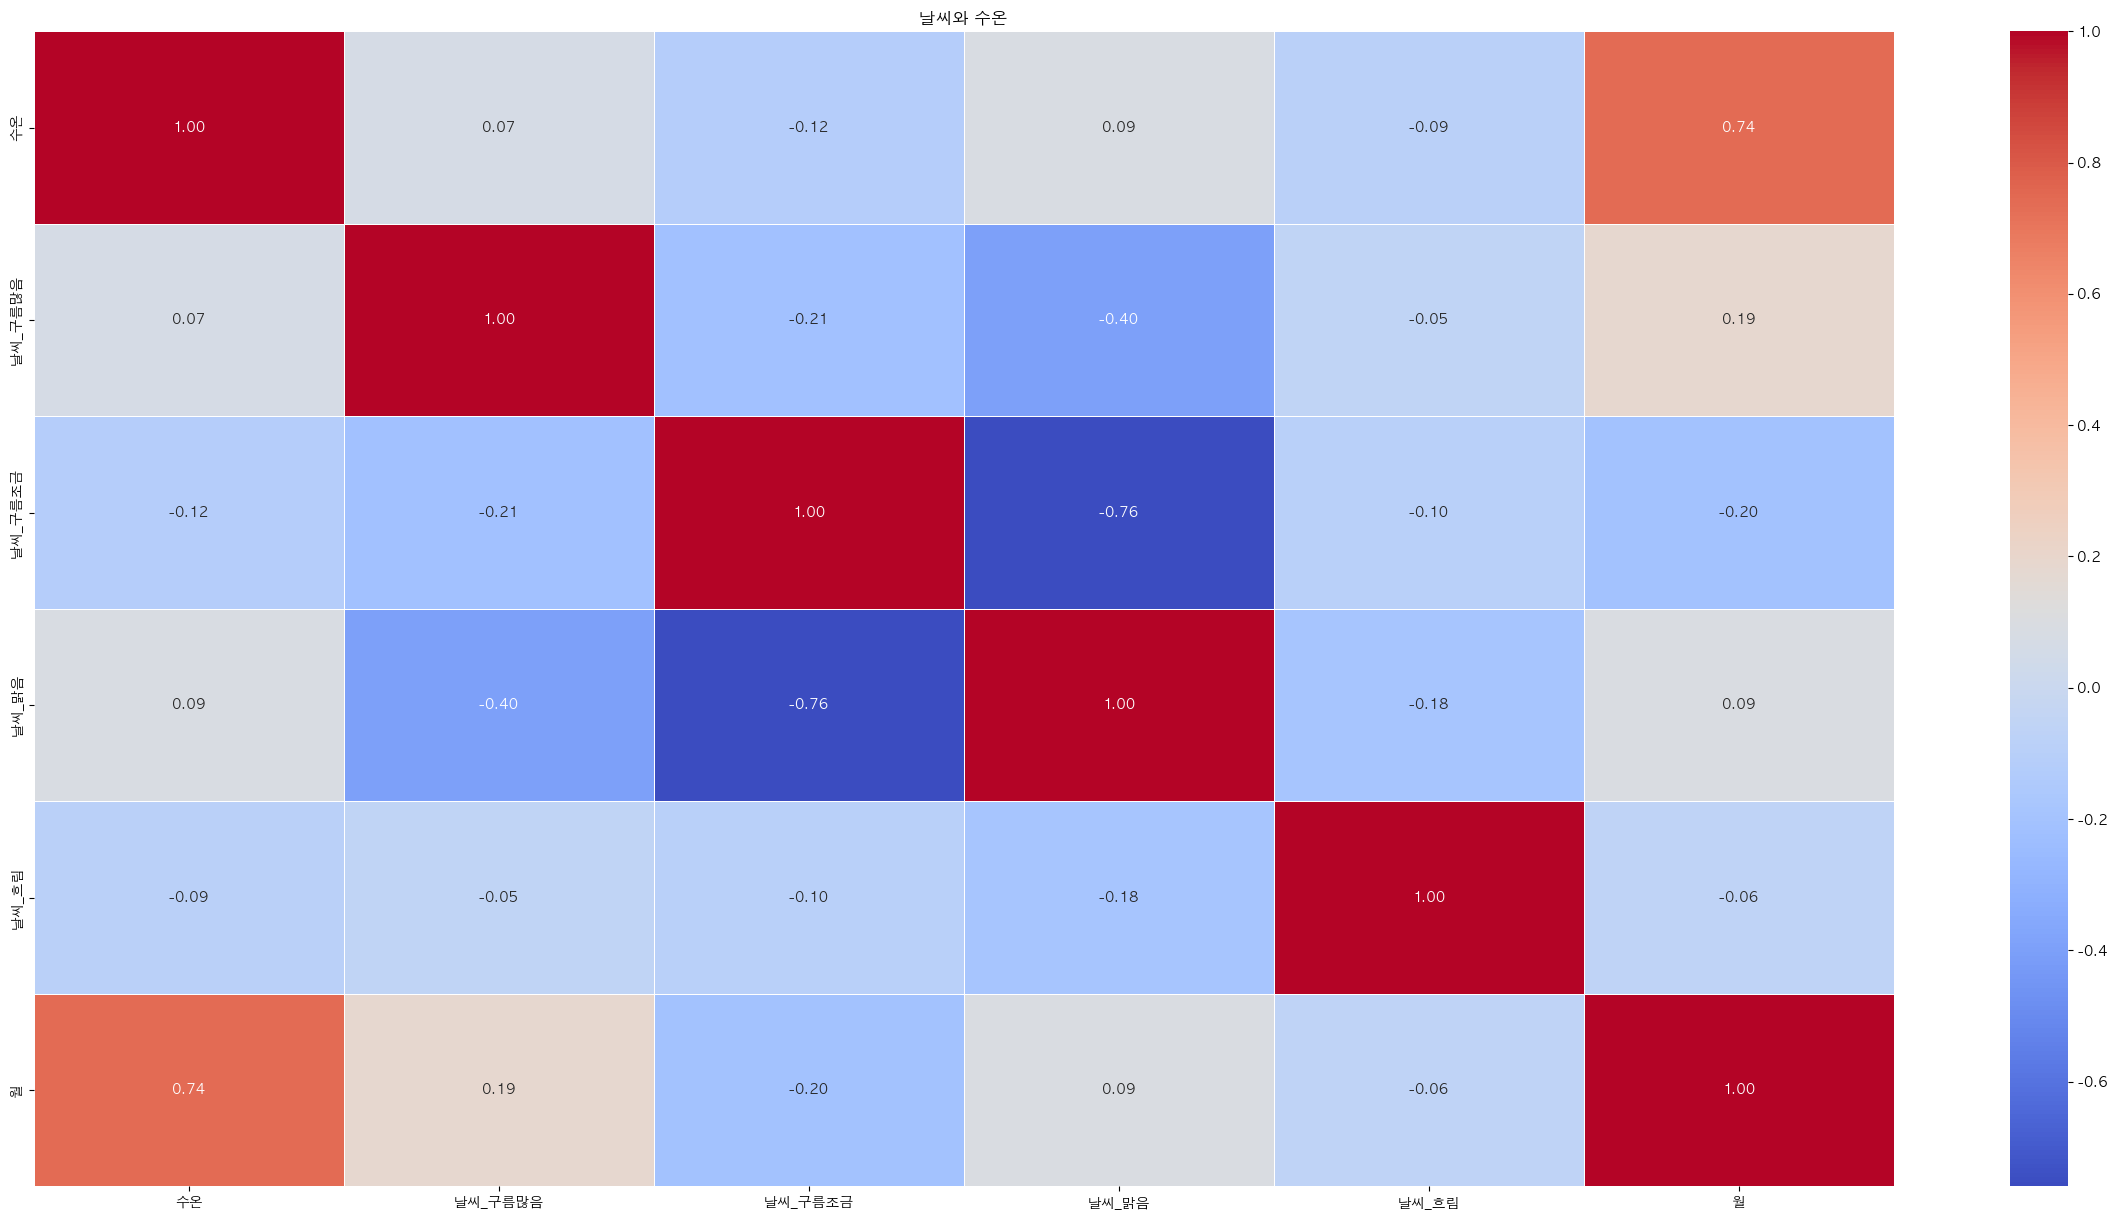

In [29]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

In [30]:
che = seogwipo.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [31]:
checorrs = che.corr()

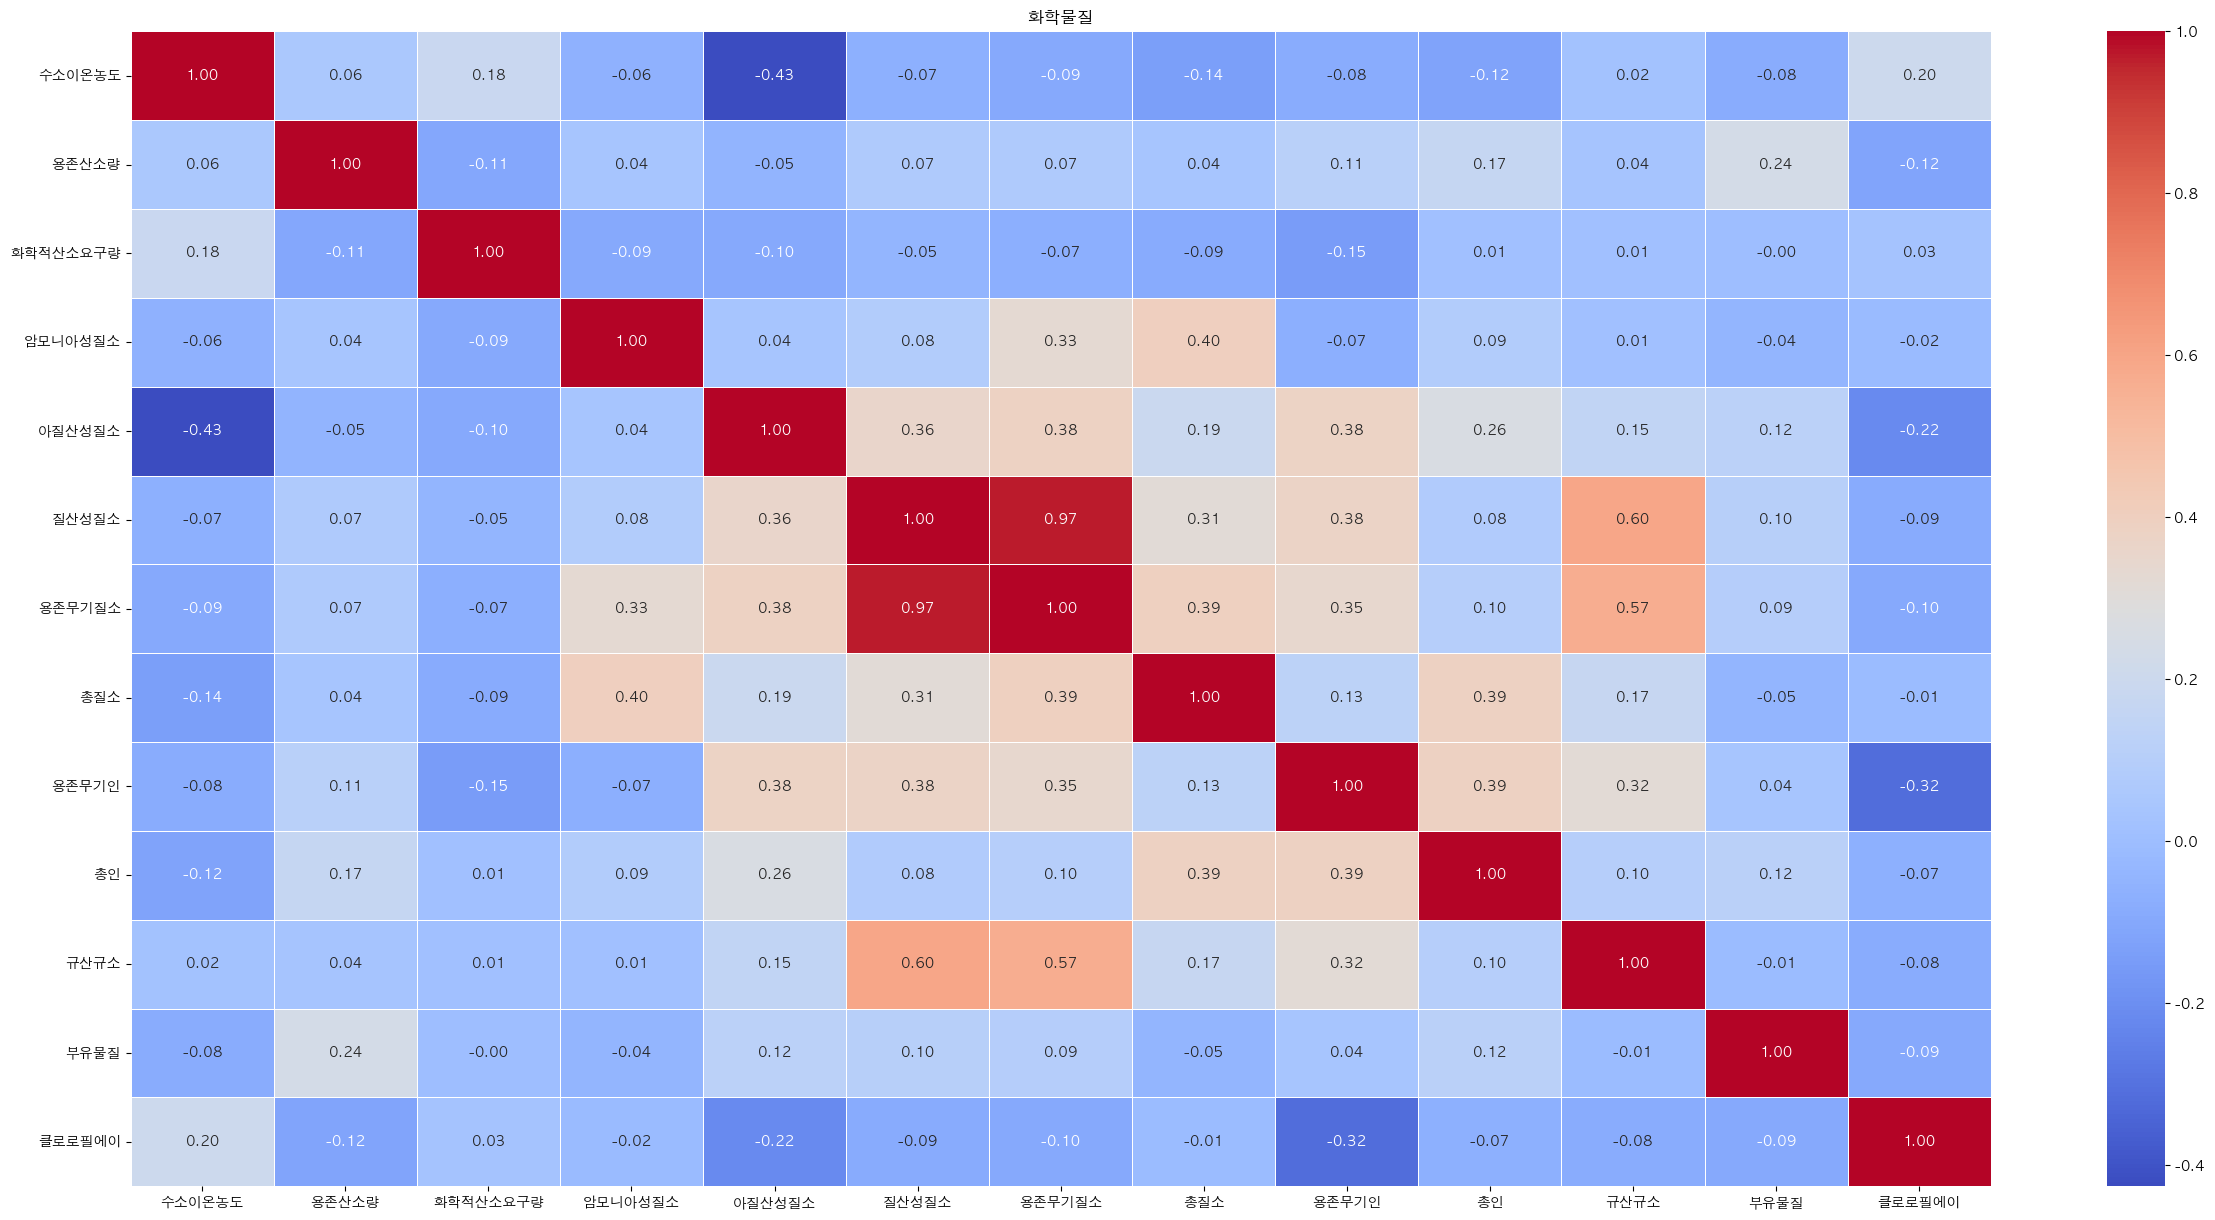

In [32]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

In [33]:
che2 = seogwipo.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [34]:
che2corrs = che2.corr()

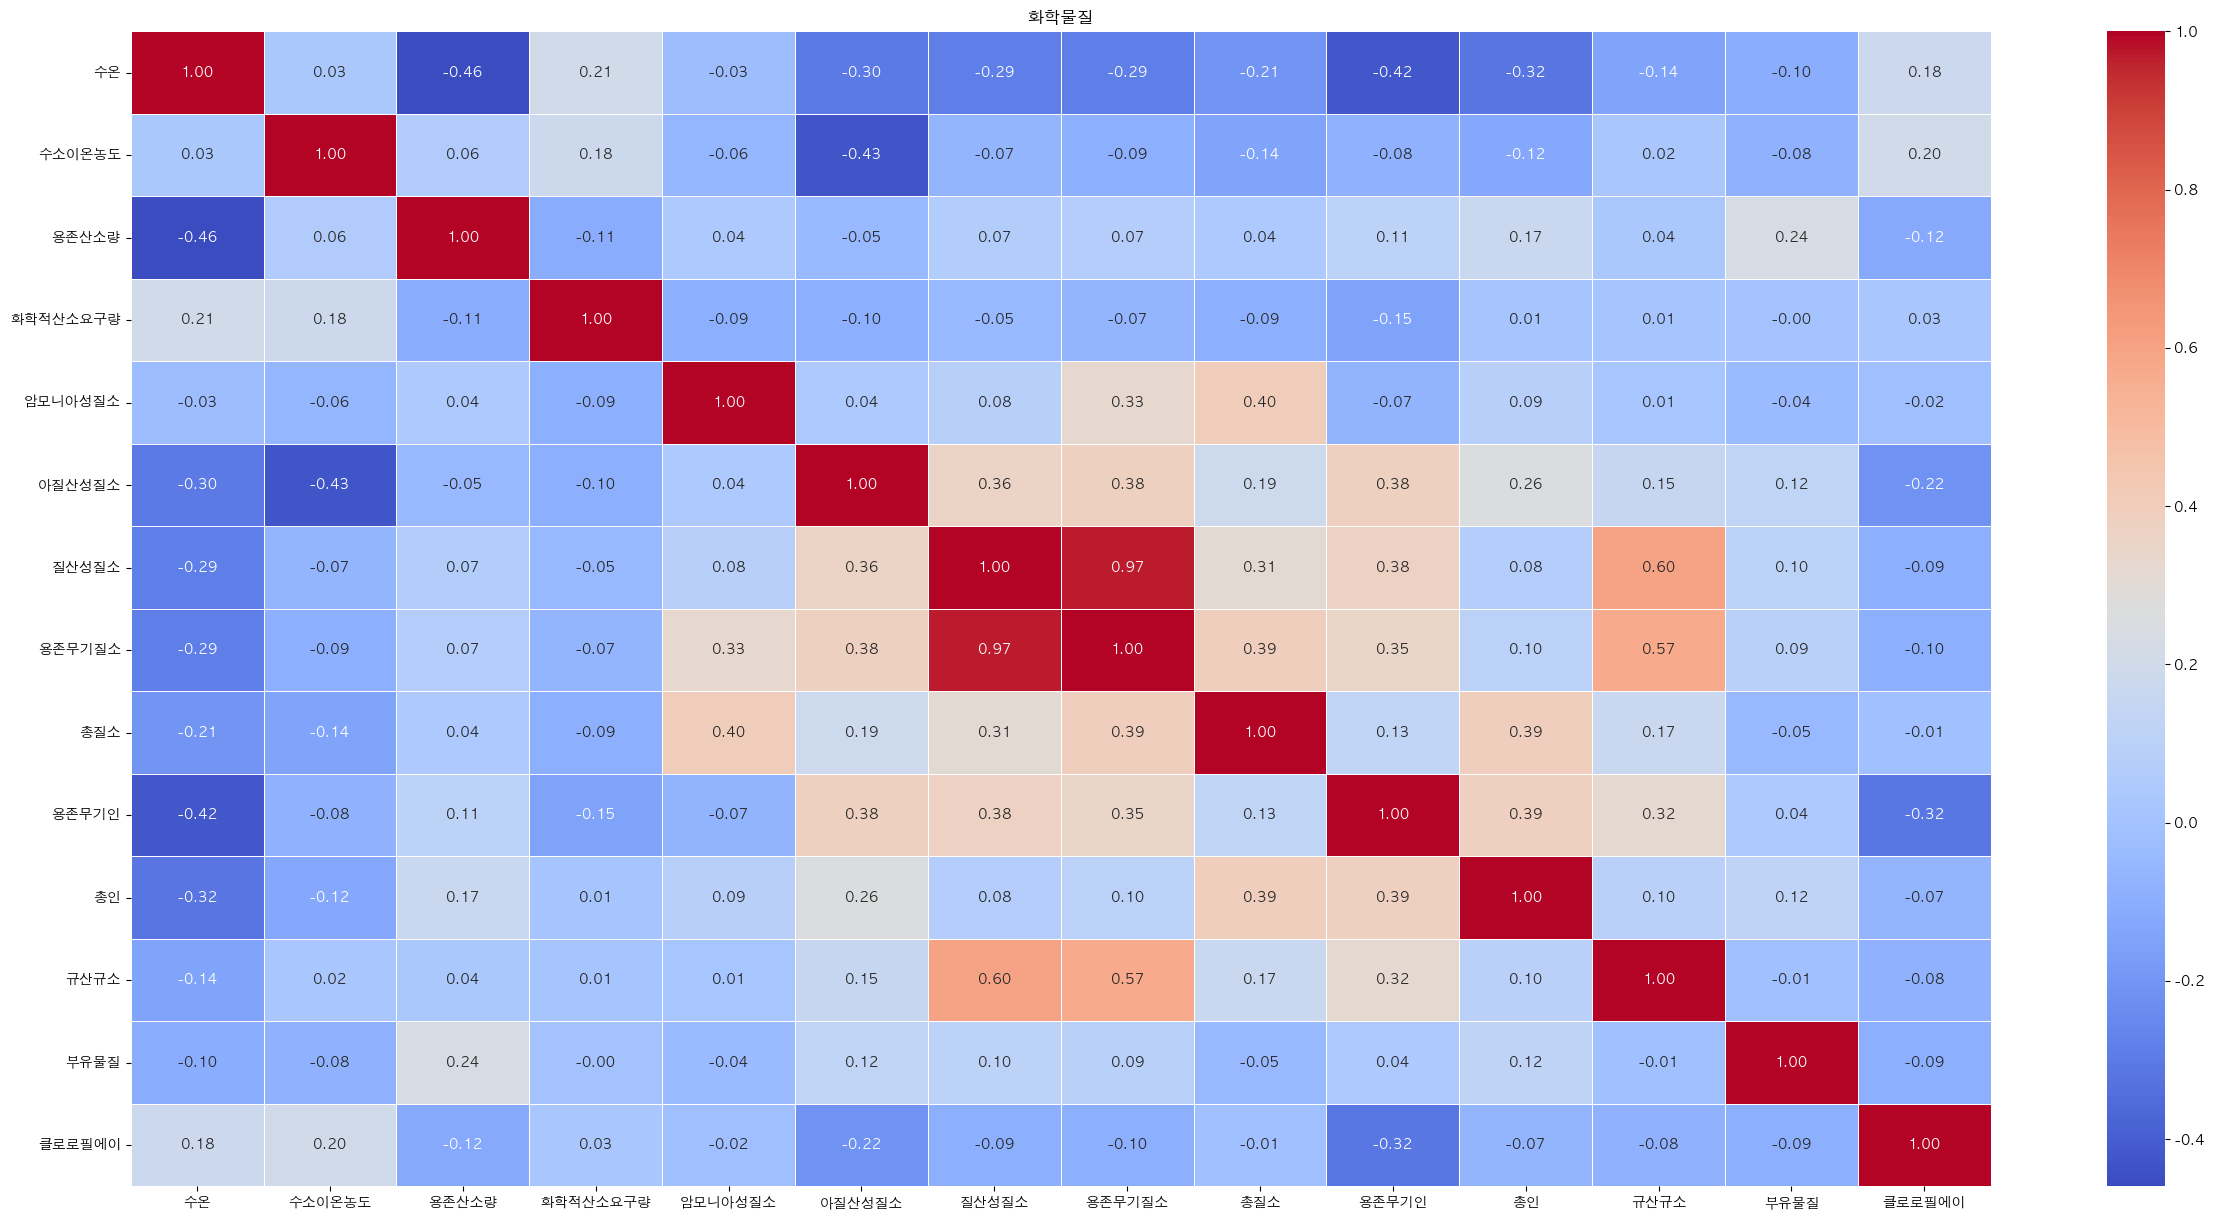

In [35]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4294621067.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4294621067.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4294621067.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4294621067.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4294621067.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4294621067.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716

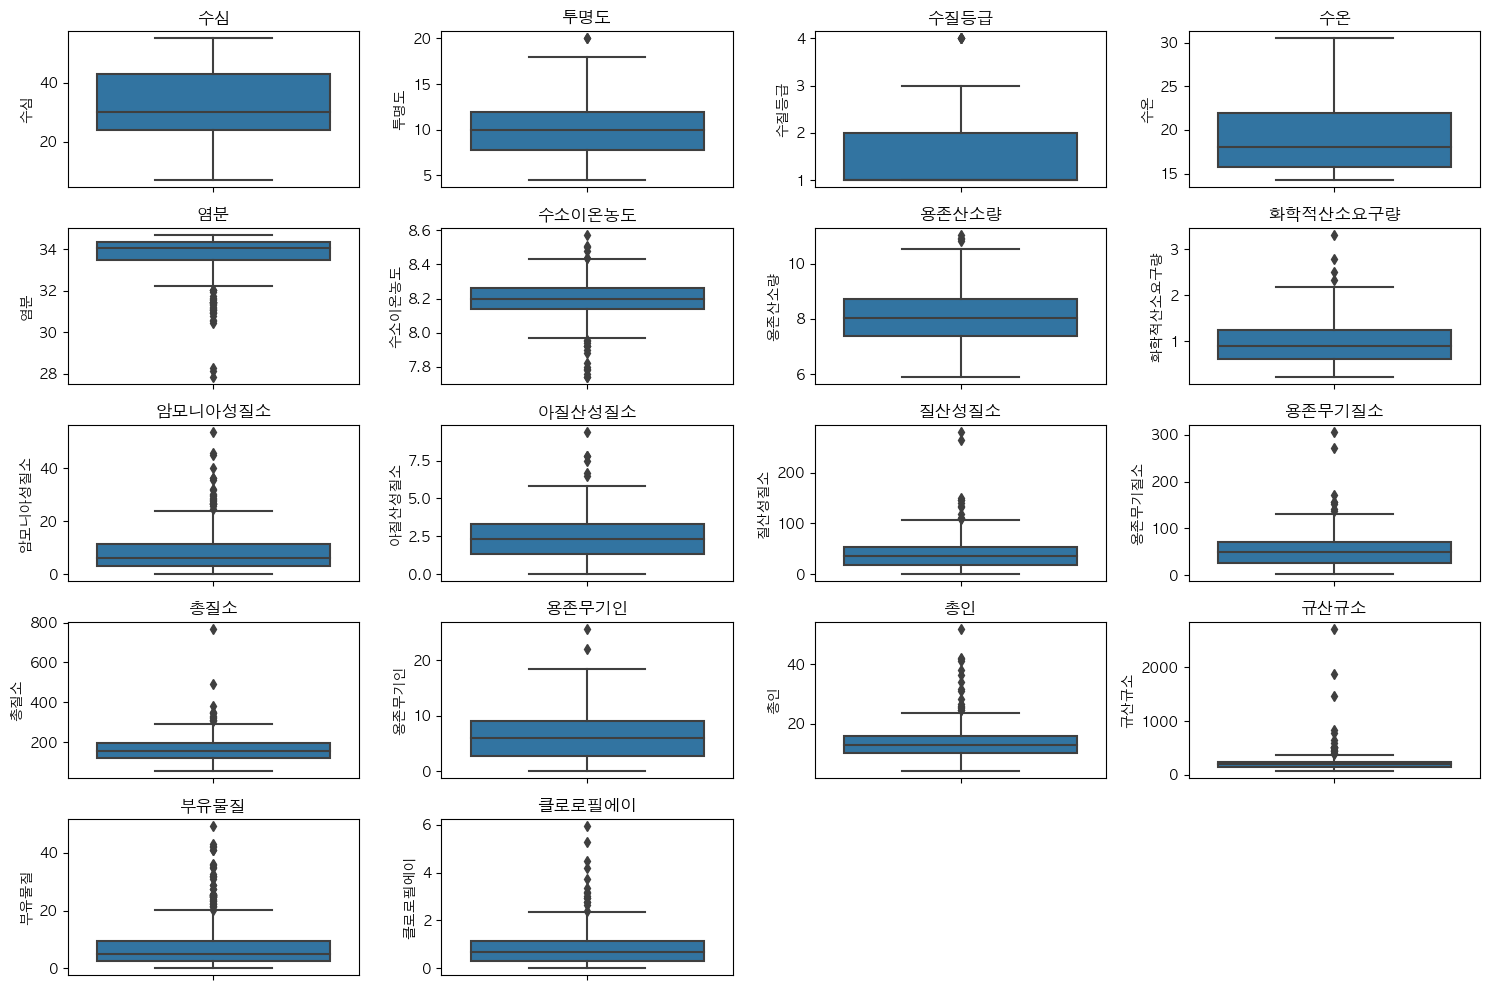

In [36]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=seogwipo[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4233887222.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4233887222.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4233887222.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4233887222.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4233887222.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4233887222.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/42338

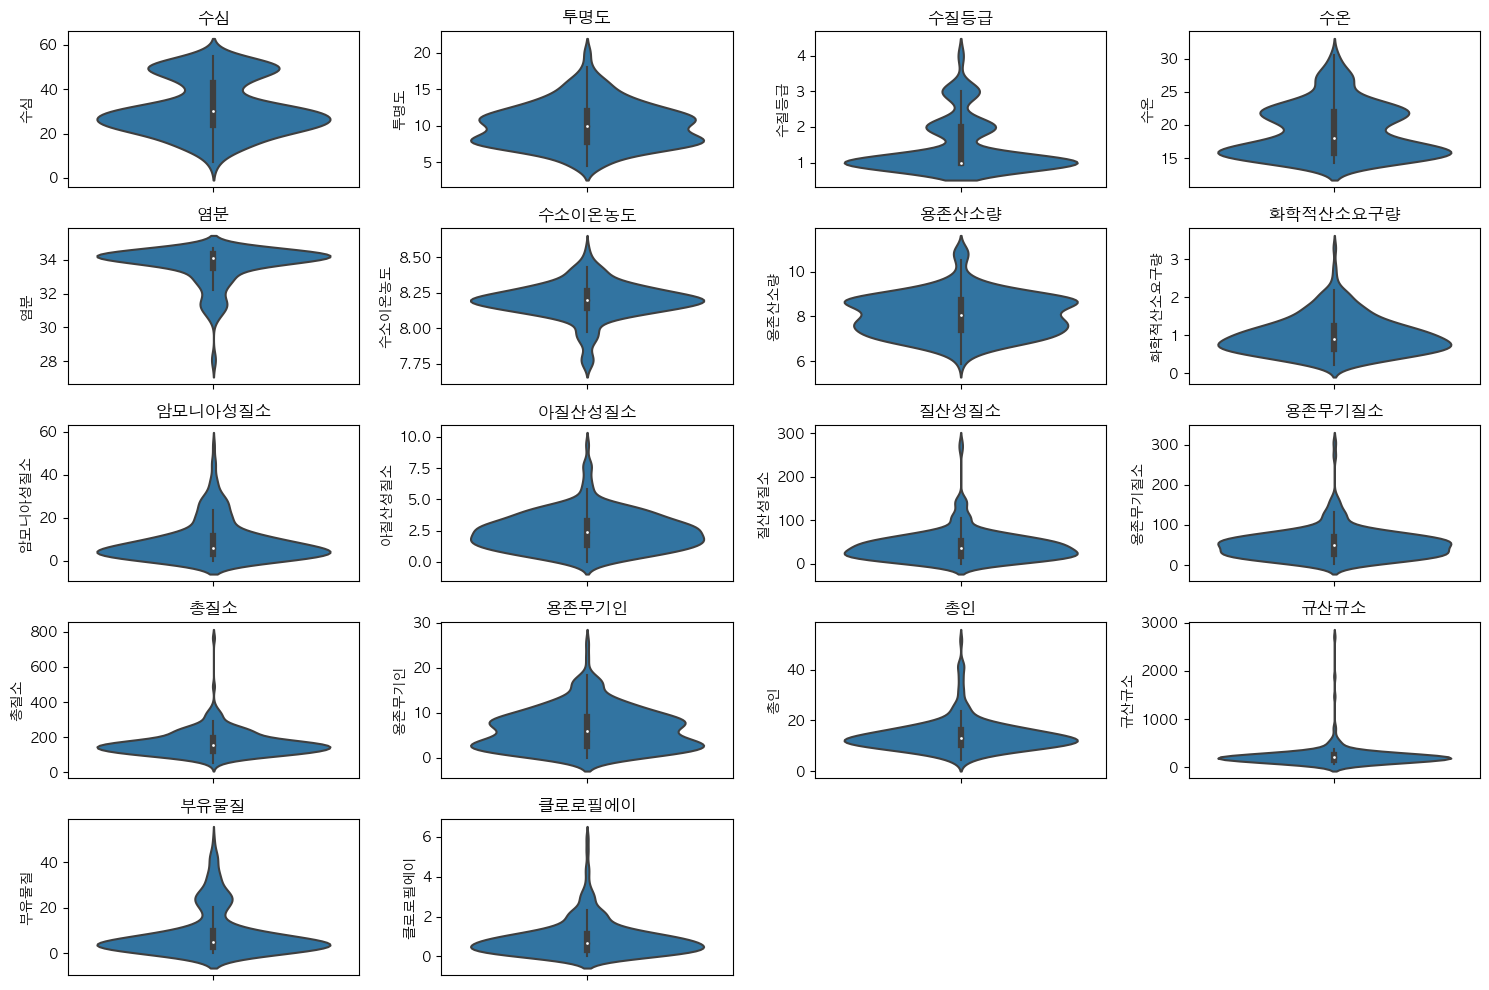

In [37]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=seogwipo[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4247037767.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4247037767.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4247037767.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4247037767.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4247037767.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/4247037767.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_79716/42470

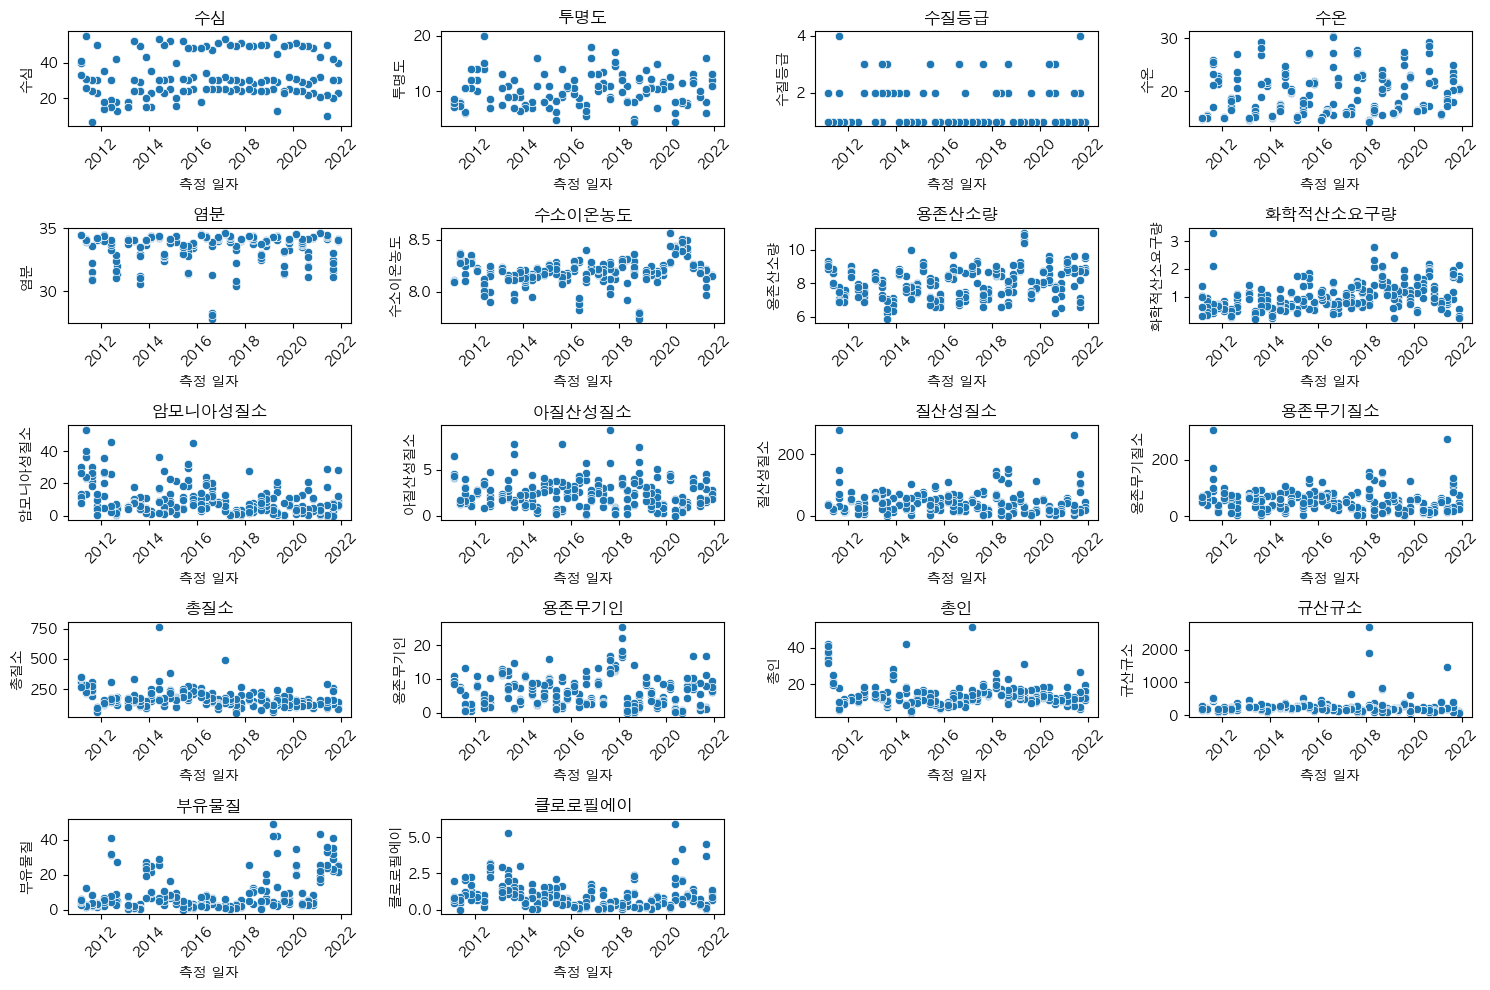

In [38]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=seogwipo, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

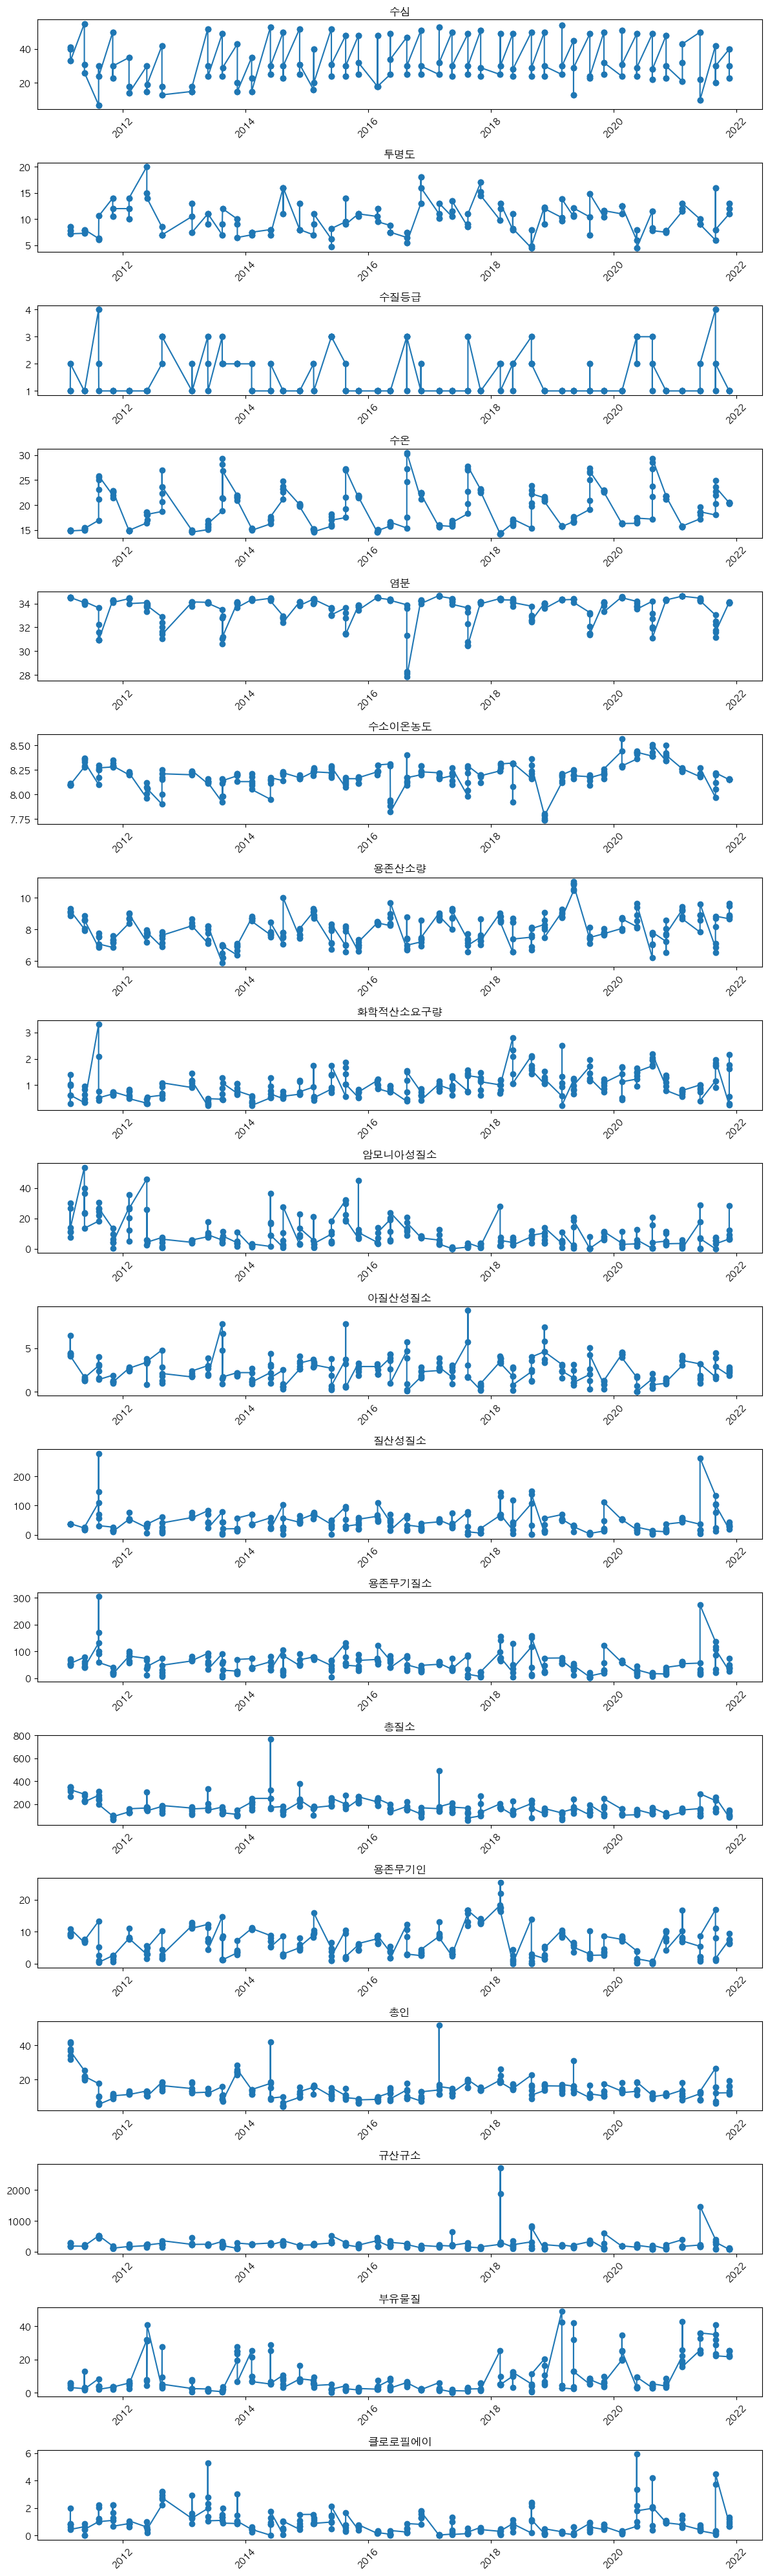

In [39]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(seogwipo['측정 일자'], seogwipo[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


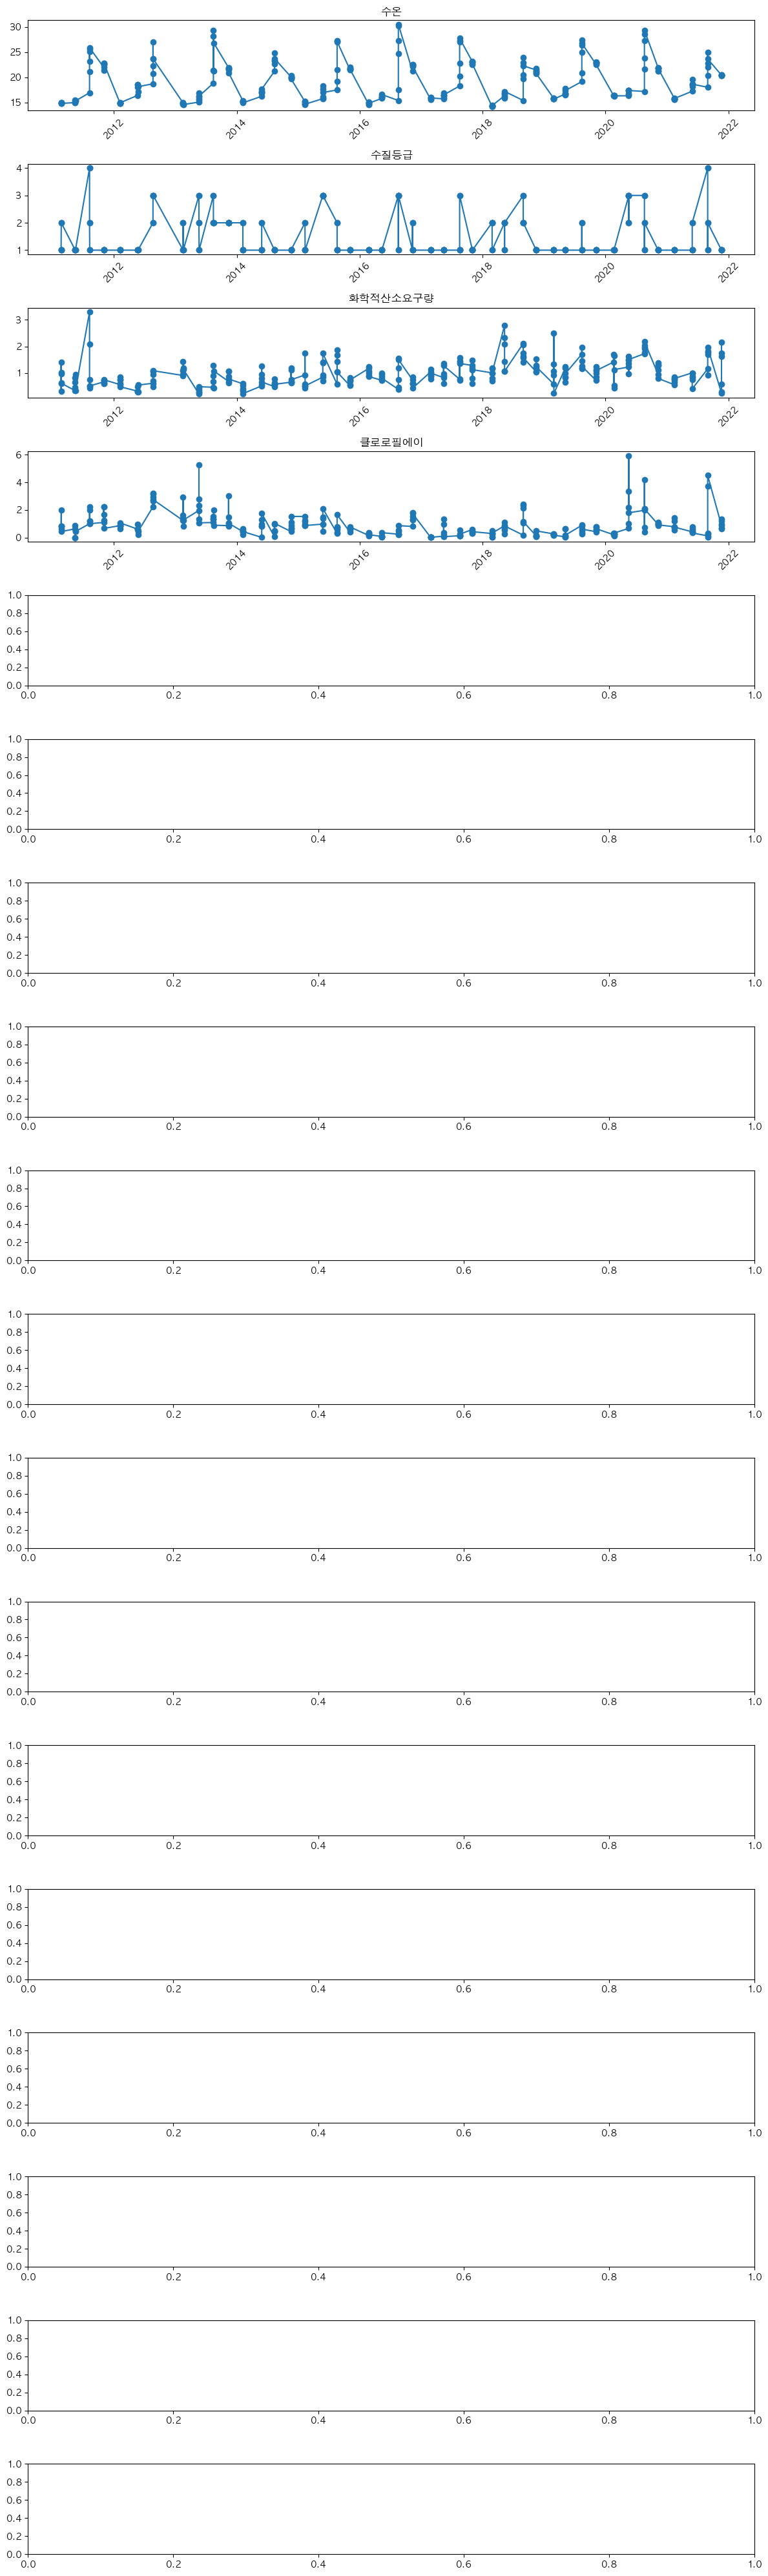

In [40]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(new_col):
    axes[i].plot(seogwipo['측정 일자'], seogwipo[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
